<a href="https://colab.research.google.com/github/yumnaizzati03/KomputasiIntelegensiaTasks/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task Week 4**

## **Komputasi Intelegensia**

Nama: Yumna Izzati

NPM: 2106633191

In [ ]:
!pip install d2l

# **Chapter 8: Modern Convolutional Neural Networks**

### **8.1 Deep Convolutional Neural Networks (AlexNet)**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
from torchsummary import summary

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

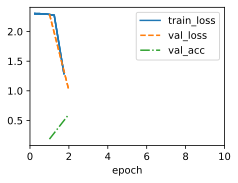

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

Proses pelatihan terhenti sebelum menyelesaikan semua epoch karena keterbatasan sumber daya komputasi dan durasi epoch yang terlalu panjang, sehingga output yang dihasilkan demikian.

### **Exercise 8.1**

In [ ]:
import torch
import torch.nn as nn
import d2l
from torchsummary import summary

In [ ]:
class Alexnet(d2l.torch.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(256, kernel_size=5, padding=2),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes)
                                 )

**1.   Following up on the discussion above, analyze the computational properties of AlexNet.**
*   Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?

Diketahui rumus jumlah parameter untuk convolutional layers:

$∑^{layers}(c_i * c_o * k_h * k_w + c_o)$

In [ ]:
3*96*11*11+96+96*256*5*5+256+256*384*3*3+384+384*384*3*3+384+384*256*3*3+256

3747200

Diketahui rumus jumlah parameter untuk fully connected layers:

$∑^{layers}(x_i * x_o + x_o)$

In [ ]:
80*80*4096+4096+4096*4096+4096+4096*10+10

43040778

In [ ]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

{'conv': 3747200, 'lr': 43040778}

Fully connected layers mendominasi dibandingkan convolutional layers.

In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          34,944
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         884,992
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
          Flatten-14                 [-


*   Calculate the computational cost for the convolutions and the fully connected layers.

Diketahui rumus computational cost untuk convolution layers:

$∑^{layers}(c_i * c_o *k_h * k_w * h_o * w_o)$

In [ ]:
3*96*11*11*54*54+96*256*5*5*26*26+256*384*3*3*12*12+384*384*3*3*12*12+384*256*3*3*12*12

962858112

Diketahui rumus computational cost untuk fully connected layers:

$∑^{layers}(x_i * x_o + x_o)$

In [ ]:
80*80*4096+4096+4096*4096+4096+4096*10+10

43040778

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    c_i = x.shape[1]
    x = module(x)
    if type(module) == nn.Conv2d:
        k = [p.shape for p in module.parameters()]
        c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
        params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 962858112, 'lr': 43040778}

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 46787978


*   How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

  - Read and Write Bandwidth

      Training
      
      Training model dalam deep learning memerlukan perpindahan data yang besar antara memori. Bandwidth memori yang tinggi dapat mendukung data diakses dengan cepat oleh unit komputasi.

      Inference
      
      Saat inferensi, beban komputasi umumnya lebih rendah daripada training. Akan tetapi, apabila inferensi dilakukan dalam skala besar, bandwidth memori yang baik dibutuhkan untuk menjaga kecepatan respon.
  - Latency

      Training
      
      Latensi memori yang tinggi dapat menambah waktu tunggu saat data diambil dari memori, sehingga memperlambat siklus pelatihan.

      Inference
      
      Saat inferensi, latensi rendah dibutuhkan agar respons cepat, sementara latensi tinggi dapat menyebabkan jeda antara input dan output.
  - Memory Size

      Training
      
      Training membutuhkan penyimpanan model, parameter, dan sekian ukuran data. Memori jika berukuran kecil akan membatasi ukuran batch dan memaksa model melakukan lebih banyak pengolahan sehingga memperlambat proses.

      Inference
      
      Saat inferensi, ukuran memori yang terbatas akan mengurangi jumlah proses yang bisa dijalankan secara paralel.

**2.   You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?**
*   Keseimbangan Memori dengan Komputasi

    Keseimbangan bandwidth memori dan kecepatan komputasi dilakukan dengan optimalisasi pipeline data sehingga tidak ada unit komputasi yang menganggur saat menunggu data, misal dengan prefetching atau latensi rendah pada memori.
*   Konsumsi Daya dengan Komputasi

    Chip yang lebih cepat tentu membutuhkan banyak daya. Maka untuk meningkatkan kecepatan/performa tanpa terlalu meningkatkan konsumsi daya, digunakan optimalisasi hardware, misal arsitektur yang lebih paralel.
*   Bandwidth Memori terhadap Ukuran Chip

    Karena meningkatkan bandwidth memori memerlukan banyak pin dan kontrol logika, menimbulkan kebutuhan area chip yang lebih besar juga, optimalisasi  dilakukan dengan menggunakan cache yang lebih efisien atau meningkatkan kompresi data sehingga data yang diakses lebih cepat diproses tanpa terlalu banyak bandwidth memori.

**3.   Why do engineers no longer report performance benchmarks on AlexNet?**
*   Ketinggalan zaman

  Setelah AlexNet, telah bermunculan banyak model baru, seperti VGG, ResNet, dan EfficientNet, yang memberikan kinerja lebih tinggi, parameter lebih sedikit, dan lebih efisien.
*   Model lain lebih unggul

  Model-model baru yang bermunculan dapat mengatasi kekurangan AlexNet, dalam hal efisiensi komputasi, kecepatan pelatihan, dan akurasi.
*   Benchmarking pada hardware modern

  Hardware untuk deep learning, seperti GPU/TPU, juga telah berkembang pesat. Benchmark pada AlexNet tidak menunjukkan kemampuan hardware modern dengan baik karena model tersebut dirancang dengan teknologi lama.

  Karena perkembangan-perkembangan pesat ini, AlexNet tidak lagi dianggap relevan untuk benchmarking modern, terutama dalam dataset besar seperti ImageNet.





**4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?**

In [ ]:
model = Alexnet(lr=0.01)
data = d2l.torch.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.torch.Trainer(max_epochs=20)
trainer.fit(model, data)

Hasil AlexNet dengan LeNet akan berbeda ketika meningkatkan jumlah epoch karena AlexNet dirancang untuk dataset yang lebih besar dan kompleks, sehingga training dengan lebih banyak epoch dapat memperbaiki generalization model terhadap data, menghasilkan model dengan akurasi lebih tinggi. Sedangkan LeNet dirancang untuk dataset yang lebih kecil dan sederhana, sehingga menaikkan jumlah epoch tidak akan memberikan peningkatan signifikan setelah beberapa waktu karena keterbatasan arsitektur model dalam mengangkap fitur kompleks dari dataset besar, sehingga lebih cepat mencapai "titik jenuh".

**5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.**

* Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

* Design a better model that works directly on 28 x 28 images.

In [ ]:
class SmallAlexnet(d2l.torch.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(1024), nn.ReLU(),
            nn.LazyLinear(num_classes)
            )

model = SmallAlexnet(lr=0.01)
data = d2l.torch.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.torch.Trainer(max_epochs=10)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.**

**7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?**

acc: 0.72


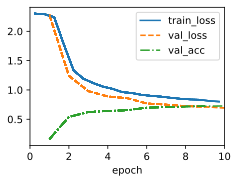

In [ ]:
class LeNet(d2l.torch.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(84),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
model = LeNet(lr=0.01)
data = d2l.torch.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.torch.Trainer(max_epochs=10)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?**

  Ya, AlexNet dapat dibuat overfitting dengan cara-cara berikut:
*   Menghapus/mengubah teknik regularisasi

  Menghapus dropout atau mengurangi tingkat regularisasi, sehingga model akan mempelajari detail yang tidak relevan dari data pelatihan.
*   Mengurangi ukuran dataset

  Dengan dataset yang lebih kecil, AlexNet akan mempelajari data pelatihan secara terlalu spesifik, sehingga tidak akan bisa menggeneralisasi dengan baik untuk data baru.
* Meningkatkan jumlah parameter

  Dengan menambah jumlah lapisan atau neuron di lapisan membuat kapasitas model lebih besar untuk mengingat detail data pelatihan sehingga dapat menyebabkan overfitting.



### **8.2 Networks Using Blocks (VGG)**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


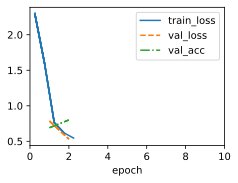

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **Exercise 8.2**

In [ ]:
import torch
import torch.nn as nn
import d2l
from torchsummary import summary

def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear,nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num

def stat_comp(net, params, x):
    for idx, module in enumerate(net):
        c_i = x.shape[1]
        x = module(x)
        if type(module) == nn.Conv2d:
            k = [p.shape for p in module.parameters()]
            c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
            params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
        if type(module) == nn.Linear:
            params['lr'] += sum(p.numel() for p in module.parameters())
    return x


def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

class VGG(d2l.torch.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(*conv_blks, nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
        self.net.apply(d2l.torch.init_cnn)

**1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.**
* Compare the number of parameters needed for AlexNet and VGG.

In [ ]:
arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg = VGG(arch=arch)
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        stat_params(module,params)
    if type(module) == nn.Linear:
        num = sum(p.numel() for p in module.parameters())
        params['lr'] += num
summary(vgg, (3, 224, 224))
params

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

{'conv': 9220480, 'lr': 119586826}

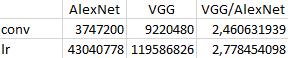

* Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        x = stat_comp(module, params, x)
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 7485456384, 'lr': 119586826}

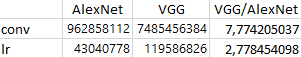

* How could you reduce the computational cost created by the fully connected layers?
  *   Mengurangi jumlah neuron di fully connected layers dapat mengurangi jumlah parameter yang harus dihitung, sehingga akan secara otomatis menurunkan biaya komputasi.
  * Menggunakan regularisasi seperti dropout untuk mengurangi overfitting sehingga mengurangi kompleksitas komputasi.
  * Menggunakan global average pooling untuk mengurangi dimensi fitur data dan jumlah parameter tanpa mengurangi performa model.
  * Mengurangi resolusi atau ukuran feature map untuk mengurangi dimensi input ke fully connected layers.

**2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?**

In [ ]:
vgg

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, 

**3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.**

In [ ]:
arch16=((2, 64), (2, 128), (3, 256), (32, 512), (3, 512))
vgg16 = VGG(arch=arch16)
vgg16

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, 

In [ ]:
arch19=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
vgg19 = VGG(arch=arch19)
vgg19

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): LazyConv2d(0, 256, kernel

**4. Upsampling the resolution in Fashion-MNIST eight-fold from $28 × 28$ to $224 × 224$ dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.**

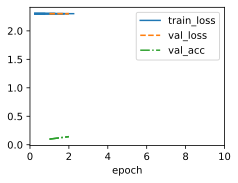

In [ ]:
model = VGG(arch=((3, 128), (3, 256)), lr=0.01)
trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1)
data = d2l.torch.FashionMNIST(batch_size=128, resize=(28, 28))
trainer.fit(model, data)

### **8.3 Network in Network (NiN)**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


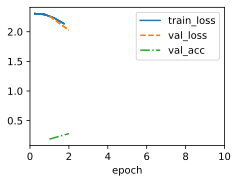

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **Exercise 8.3**

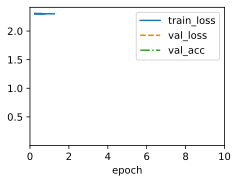

In [ ]:
import torch
import torch.nn as nn
import d2l
from torchsummary import summary

def nin_block(out_channels, kernel_size, strides, padding, conv1s=[[1,0],[1,0]]):
    layers = [nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding),nn.ReLU()]
    for conv1_size,conv1_padding in conv1s:
        layers.append(nn.LazyConv2d(out_channels, kernel_size=conv1_size,padding=conv1_padding))
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)

class Nin(d2l.torch.Classifier):
    def __init__(self, arch, lr=0.1):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.AdaptiveAvgPool2d((1, 1)))
        layers.append(nn.Flatten())
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.torch.init_cnn)

data = d2l.torch.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0),(256,5,1,2),(384,3,1,1),(10,3,1,1))
model = Nin(arch, lr=0.03)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.torch.init_cnn)

# Check for CUDA availability and set the device accordingly
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA")
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU instead")

# Move the model to the selected device
model.to(device)

# If CUDA is available, reset peak memory stats
if device.type == 'cuda':
    scaler = torch.cuda.amp.GradScaler()

trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1 if device.type == 'cuda' else 0)
# The d2l.torch.Trainer's fit method likely expects the data loaders to be accessed
# through the data object directly. Remove the data_iter argument.
trainer.fit(model, data)

# If CUDA is available, print memory stats
if device.type == 'cuda':
    memory_stats = torch.cuda.memory_stats(device=device)
    print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
    print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

# Get data loaders using the data object directly
train_iter = data.get_dataloader(True, num_workers=4, pin_memory=True)
test_iter = data.get_dataloader(False, num_workers=4, pin_memory=True)

X,y = next(iter(test_iter))
X = X.to(device)  # Move data to the correct device
y = y.to(device)  # Move data to the correct device

# If CUDA is available, reset peak memory stats before inference
if device.type == 'cuda':
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.empty_cache()

y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

# If CUDA is available, print memory stats after inference
if device.type == 'cuda':
    memory_stats = torch.cuda.memory_stats(device=device)
    print("Peak memory usage:", memory_stats["allocated_bytes.all"])

**1. Why are there two $1 × 1$ convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?**

* Dua Lapisan konvolusi 1 × 1 dalam blok NiN bertujuan untuk mengurangi jumlah feature maps dan melakukan kombinasi linier untuk setiap piksel, sehingga akan mengurangi kompleksitas komputasi. Selain itu, mampu meningkatkan non-linearitas, sehingga berpotensi menghasilkan akurasi lebih baik.
* Jika menambah jumlah lapisan konvolusi 1 × 1 menjadi tiga, model akan mampu mengekstraksi fitur yang lebih kompleks, namun biaya komputasi meningkat.
Non-linearitas meningkat, namun bisa menyebabkan overfitting.
* Jika mengurangi jumlah lapisan konvolusi 1 × 1 menjadi satu, model mungkin tidak mampu menangkap fitur yang kompleks, sehingga performa menurun.
Biaya komputasi akan berkurang, tetapi model kurang bisa generalisasi terhadap data yang lebih kompleks.


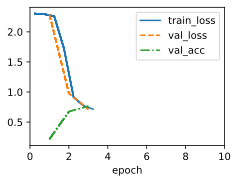

In [ ]:
arch = ((96,11,4,0,3),(256,5,1,2,3),(384,3,1,1,3),(10,3,1,1,3))
model = Nin(arch)
trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

In [ ]:
data = d2l.torch.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0,[[1,0]]),(256,5,1,2,[[1,0]]),(384,3,1,1,[[1,0]]),(10,3,1,1,[[1,0]]))
model = Nin(arch, lr=0.05)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.torch.init_cnn)
trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**2. What changes if you replace the $1 × 1$ convolutions by $3 × 3$ convolutions?**

In [ ]:
arch = ((96,11,4,0,[[3,1],[3,1]]),(256,5,1,2,[[3,1],[3,1]]),(384,3,1,1,[[3,1],[3,1]]),(10,3,1,1,[[3,1],[3,1]]))
model = Nin(arch)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

**3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?**

In [ ]:
class MLPNin(d2l.torch.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.Flatten())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

**4. Calculate the resource usage for NiN.**
* What is the number of parameters?

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
model = Nin(arch)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 2459268


* What is the amount of computation?

In [ ]:
!pip install thop
from thop import profile
flops, params = profile(model, inputs=(X,))
print("Total FLOPs:", flops)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
Total FLOPs: 983983402.0


* What is the amount of memory needed during training?

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize memory counters
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

* What is the amount of memory needed during prediction?

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
_ = model(X)
memory_stats = torch.cuda.memory_stats(device=device)
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

**5. What are possible problems with reducing the $384 × 5 × 5$ representation to a $10 × 5 × 5$ representation in one step?**
* Reduksi apabila terlalu drastis dalam satu langkah dapat menyebabkan kehilangan informasi penting, fitur-fitur relevan yang seharusnya diekstraksi secara bertahap.
* Meningkatkan risiko overfitting terhadap data pelatihan karena model tidak belajar secara bertahap dari fitur yang lebih kompleks.
* Model kemungkingan tidak punya cukup waktu atau kapasitas untuk menangkap pola-pola kompleks pada data, sehingga kinerja model terhadap data baru bisa menurun.

**6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.**

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
nin = Nin(arch)
nin

Nin(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 96, kernel_size=(11, 11), stride=(4, 4))
      (1): ReLU()
      (2): LazyConv2d(0, 96, kernel_size=(2, 2), stride=(1, 1))
      (3): ReLU()
    )
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(2, 2), stride=(1, 1))
      (3): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): LazyConv2d(0, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 384, kernel_size=(2, 2), stride=(1, 1))
      (3): ReLU()
    )
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.5, inplace=False)
    (7): Sequential(
      (0): LazyConv2d(0, 10, kernel_size=(3, 3), st

In [ ]:
arch15 = ((64,3,2,1),
          (256,3,1,1),
          (256,3,1,1),
          (384,3,1,1),
          (10,3,1,1))
nin15 = Nin(arch15)
nin15

Nin(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 64, kernel_size=(1, 1), stride=(1, 1))
      (5): ReLU()
    )
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(1, 1), stride=(1, 1))
      (5): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(1, 1), stride=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(

### **8.4 Multi-Branch Networks (GoogLeNet)**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


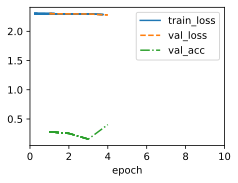

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **Exercise 8.4**

In [ ]:
import torch.nn as nn
import torch
import d2l
from torchsummary import summary

class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

class GoogleNet(d2l.torch.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                             Inception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                             Inception(160, (112, 224), (24, 64), 64),
                             Inception(128, (128, 256), (24, 64), 64),
                             Inception(112, (144, 288), (32, 64), 64),
                             Inception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                             Inception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

**1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:**
* Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.

In [ ]:
class NormInception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

class NormGoogleNet(d2l.torch.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(NormInception(64, (96, 128), (16, 32), 32),
                             NormInception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(NormInception(192, (96, 208), (16, 48), 64),
                             NormInception(160, (112, 224), (24, 64), 64),
                             NormInception(128, (128, 256), (24, 64), 64),
                             NormInception(112, (144, 288), (32, 64), 64),
                             NormInception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(NormInception(256, (160, 320), (32, 128), 128),
                             NormInception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

* Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[3], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[4], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU())
        self.b2_1 = nn.Sequential(nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b2_2 = nn.Sequential(nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3_1 = nn.Sequential(nn.LazyConv2d(c3[2], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b3_2 = nn.Sequential(nn.LazyConv2d(c3[3], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o2_1 = self.b2_1(o2)
        o2_2 = self.b2_2(o2)
        o3 = self.b3(x)
        o3_1 = self.b3_1(o3)
        o3_2 = self.b3_2(o2)
        o4 = self.b4(x)
        return torch.cat((o1,o2_1,o2_2,o3_1,o3_2,o4),dim=1)

* Use label smoothing for model regularization, as described in Szegedy et al. (2016).

In [ ]:
class LSRGoogleNet(GoogleNet):
    def __init__(self, eps=0, lr=0.1, num_classes=10):
        super().__init__(lr=lr, num_classes=num_classes)
        self.save_hyperparameters()

    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        u = torch.ones(y.shape).tye(torch.float32)/y.shape[-1]
        lsr_loss = (1-self.eps)*F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none')
        +self.eps*F.cross_entropy(y_hat, u, reduction='mean' if averaged else 'none')
        return lsr_loss

* Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.

In [ ]:
import torch
from torch import nn
import d2l
from torch.nn import functional as F

class GoogleNet(d2l.torch.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                             Inception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                             Inception(160, (112, 224), (24, 64), 64),
                             Inception(128, (128, 256), (24, 64), 64),
                             Inception(112, (144, 288), (32, 64), 64),
                             Inception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                             Inception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        # Change in_channels to 3 to match input tensor shape
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.torch.init_cnn)

    def forward(self, X):
        if not self.is_initialized:
            self.net(torch.randn(2, 1, 32, 32))
            self.initialize_weights()
            self.is_initialized = True

        if X.shape[0] == 1:
            self.net.eval()
            output = self.net(X)
            self.net.train()
            return output
        else:
            return self.net(X)

    def initialize_weights(self):
        """Initialize the weights of the network."""
        for m in self.net.modules():
            if isinstance(m, (nn.Conv2d, nn.Linear)):
                nn.init.xavier_uniform_(m.weight)

**2. What is the minimum image size needed for GoogLeNet to work?**

GoogLeNet membagi ukuran gambar sebanyak 5x, sehingga ukuran gambar minimumnya adalah $2^5 = 32$.

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,1,32,32)
model(X)
for m in model.net:
    X = m(X)
    print(X.shape)

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,1,64,64)
model(X)
for m in model.net:
    X = m(X)
    print(X.shape)

**3. Can you design a variant of GoogLeNet that works on Fashion-MNIST's native resolution of $28 × 28$ pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?**

In [ ]:
class SmallGoogLeNet():
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=5, stride=1, padding=2),
                             nn.ReLU(),
                             # nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
                            )

    def __init__(self, lr=0.1, num_classes=10): # Corrected indentation to align with b1()
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(),self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.torch.init_cnn)

**4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?**

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

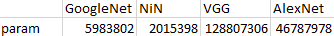

Reduksi ukuran parameter yang signifikan pada NiN dan GoogLeNet dilakukan dengan convolution 1x1 dan modul inception. Model jadi mampu menangkap fitur secara efisien namun tetap menjaga jumlah parameter. Konvolusi 1x1 pada NiN dan GoogLeNet berfungsi untuk mengurangi kompleksitas jaringan, menghindari fully connected layers yang besar, dan meningkatkan efisiensi komputasi.

**5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?**

* Ukuran Memori

  AlexNet yang menggunakan fully connected layers sangat besar, memerlukan memori yang besar juga. Sementara GoogLeNet membutuhkan memori lebih kecil karena mengurangi penggunaan fully connected layers dan memanfaatkan konvolusi 1×1.
* Bandwidth Memori

  GoogLeNet menggunakan bandwidth memori secara lebih efisien, walaupun "demand" lebih tinggi akibat banyaknya operasi paralel convolution dalam modul Inception. Sementara AlexNet memerlukan bandwidth lebih besar untuk menyimpan hasil intermediate dari fully connected layers yang besar.
* Ukuran Cache

  GoogLeNet memanfaatkan konvolusi 1×1 untuk mengurangi dimensi feature map dan jumlah parameter, sehingga penggunaan cache lebih kecil. Sementara AlexNet membutuhkan cache lebih besar untuk menangani fully connected layers.
* Jumlah Komputasi

  Dibandingkan AlexNet, GoogLeNet menggunakan lebih sedikit parameter, namun lebih banyak lapisan dan operasi konvolusi yang kompleks. Sehingga GoogLeNet membutuhkan lebih banyak komputasi dalam beberapa tahap, meskipun ukuran modelnya lebih efisien.
* Operasi Khusus

  GoogLeNet menggunakan operasi khusus, seperti konvolusi 1×1 dan kombinasi multi-skala dalam modul Inception guna meningkatkan efisiensi dan pengelolaan memori.

### **8.5 Batch Normalization**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    if not torch.is_grad_enabled():
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        X_hat = (X - mean) / torch.sqrt(var + eps)
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

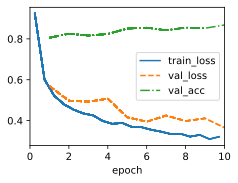

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

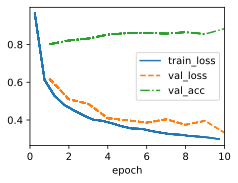

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### **Exercise 8.5**

**1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?**

Ya, parameter bias dari fully connected layers atau convolutional layer sebaiknya dihapus sebelum batch normalization. Saat normalization, dilakukan shifting dan scaling pada data yang mengganti fungsi parameter bias. Sehingga menjaga parameter di lapisan sebelumnya tidak lagi diperlukan karena batch normalization pada akhirnya akan mengoreksinya. Menghapus parameter bias bertujuan untuk menghindari redundansi dan menyederhanakan model.

**2. Compare the learning rates for LeNet with and without batch normalization.**
* Plot the increase in validation accuracy.

In [ ]:
import torch
import torch.nn as nn
import d2l
from torchsummary import summary

def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.torch.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

class BNLeNet(d2l.torch.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

def stat_model_acc(model, data, plot_flag):

    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.torch.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

In [ ]:
data = d2l.torch.FashionMNIST(batch_size=128)
lr_list = [0.001,0.01,0.03,0.1,0.3]
le_accs= []
ble_accs = []
for lr in lr_list[:1]:
    le = LeNet(lr=lr)
    ble = BNLeNet(lr=lr)
    le_accs.append(stat_model_acc(le, data, False))
    ble_accs.append(stat_model_acc(ble, data, False))

* How large can you make the learning rate before the optimization fails in both cases?

In [ ]:
data = d2l.torch.FashionMNIST(batch_size=128)
lr_list = [1,3,10,30]
le_accs= []
ble_accs = []
for lr in lr_list:
	le = LeNet(lr=lr)
	ble = BNLeNet(lr=lr)
	le_accs.append(stat_model_acc(le, data))
	ble_accs.append(stat_model_acc(ble, data))

**3. Do we need batch normalization in every layer?**

Tidak, batch normalization tidak selalu dibutuhkan di setiap lapisan. Batch normalization akan efektif apabila digunakan di lapisan dengan distribusi aktivasi yang berubah secara signifikan selama pelatihan, seperti di convolutional atau fully connected layers. Berikut pertimbangannya:
* Tidak semua lapisan mengalami perubahan distribusi aktivasi yang besar. Lapisan output atau lapisan yang sudah memiliki normalisasi internal tidak memerlukan batch normalization.
* Menggunakan batch normalization di setiap lapisan dapat meningkatkan beban komputasi dan memori, sehingga malah menurunkan efisiensi dan hanya menambah kompleksitas model.

**4. Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?**

In [ ]:
def lite_batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum, mean_flag):
    if not torch.is_grad_enabled():
        if mean_flag:
            X_hat = X - moving_mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        if mean_flag:
            X_hat = X - mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

class LiteBatchNorm(nn.Module):
    def __init__(self, num_features, num_dims, mean_flag=True):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)
        self.mean_flag = mean_flag

    def forward(self, X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = lite_batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1, mean_flag=self.mean_flag)
        return Y

class LiteBNLeNetScratch(d2l.torch.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), LiteBatchNorm(6, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), LiteBatchNorm(16, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            LiteBatchNorm(120, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(), nn.LazyLinear(84),
            LiteBatchNorm(84, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = LiteBNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

In [ ]:
model = LiteBNLeNetScratch(lr=0.1,mean_flag=False)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

**5. Fix the parameters beta and gamma. Observe and analyze the results.**

In [ ]:
class FixedBatchNorm(nn.Module):
    def __init__(self, num_features, num_dims, beta=None, gamma=None):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = torch.ones(shape) if gamma is None else gamma
        self.beta = torch.zeros(shape) if beta is None else beta
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        print(X.device)
        X = X.to('cuda')
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y


class FixedBNLeNetScratch(d2l.torch.Classifier):
    def __init__(self, lr=0.1, num_classes=10, beta=None, gamma=None):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), FixedBatchNorm(6, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), FixedBatchNorm(16, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            FixedBatchNorm(120, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(), nn.LazyLinear(84),
            FixedBatchNorm(84, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = FixedBNLeNetScratch(lr=0.1)
stat_model_acc(model, data)
model = model.to('cuda')
model.apply_init([next(iter(data.get_dataloader(True)))[0].to('cuda')], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

**6. Can you replace dropout by batch normalization? How does the behavior change?**

Pada dasarnya, batch normalization dan dropout memiliki tujuan berbeda. Dropout bertujuan untuk mengurangi overfitting dan berfungsi sebagai regularisasi model. Sementara batch normalization bertujuan untuk menstabilkan dan mempercepat pelatihan, tidak secara langsung berfungsi sebagai regularisasi seperti dropout. Sehingga jika dropout diganti batch normalization, model memang bisa menjadi lebih stabil dan proses pelatihan lebih cepat. Akan tetapi, model bisa lebih riskan mengalami overfitting.


**7. Research ideas: think of other normalization transforms that you can apply:**
* Can you apply the probability integral transform?

In [ ]:
import numpy as np

def linear_interpolation(x, known_x, known_y):
    lower_indices = torch.searchsorted(known_x, x, right=True).to('cuda') - 1
    upper_indices = lower_indices + 1
    max_indices = torch.ones(len(x)).to('cuda')*(len(known_y)-1)
    upper_indices = torch.min(upper_indices, max_indices).type(torch.long)
    print('li:',known_y.device)
    known_y = known_y.to('cuda')
    print(known_y.device,lower_indices.device)
    lower_y = known_y[lower_indices]
    upper_y = known_y[upper_indices]

    # Calculate the interpolation weights
    weights = (x - known_x[lower_indices]) / (known_x[upper_indices] - known_x[lower_indices])

    # Perform linear interpolation
    interpolated_y = lower_y + weights * (upper_y - lower_y)
    return interpolated_y

def gen_sort_cdf(data):
    sorts = []
    cdfs = []
    for i in range(data.shape[1]):
        sort,_ = torch.sort(data[:, i]) #.detach().numpy()
        cdf = torch.arange(1, len(sort) + 1) / len(sort)
        cdf = cdf.to('cuda')
        sorts.append(sort.reshape(-1,1))
        cdfs.append(cdf.reshape(-1,1))
        sorts.append(torch.tensor(sort).reshape(-1,1))
        cdfs.append(torch.tensor(cdf).reshape(-1,1))
    return torch.cat(sorts, dim=1), torch.cat(cdfs, dim=1)

def pit_col(sorted_data, cdf_values, data):
    sorted_data = np.sort(org_data)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    transformed_data = linear_interpolation(data, sorted_data, cdf_values)
    return transformed_data.reshape(-1,1)

def pit(sorted_data, cdf_values, data):
    return torch.cat([pit_col(sorted_data[:,i], cdf_values[:,i], data[:, i]) for i in range(data.shape[1])], dim=1)

def batch_pit_norm(X, gamma, beta, moving_sorted, moving_cdf, momentum):
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    X = X.to('cuda')
    moving_sorted = moving_sorted.to('cuda')
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = pit(moving_sorted, moving_cdf, cdfs, X)
    else:
        sorts, cdfs = gen_sort_cdf(X)
        X_hat = pit(sorts, cdfs, X)
        print('sort',moving_sorted.device,sorts.device)
        print('cdf',moving_cdf.device,cdfs.device)
        moving_sorted = (1.0 - momentum) * moving_sorted + momentum * sorts
        moving_cdf = (1.0 - momentum) * moving_cdf + momentum * cdfs
    X_hat = X.reshape(shape)
    print(gamma.device,X_hat.device,beta.device)
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_sorted, moving_cdf

class PitBatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape)).to('cuda')
        self.beta = nn.Parameter(torch.zeros(shape)).to('cuda')
        self.moving_sorted = torch.zeros(shape)
        self.moving_cdf = torch.zeros(shape)

    def forward(self, X):
        X = X.to('cuda')
        if self.moving_sorted.device != X.device:
            self.moving_sorted = self.moving_sorted.to(X.device)
            self.moving_cdf = self.moving_cdf.to(X.device)
        print(self.moving_sorted.device,self.moving_cdf.device)
        Y, self.moving_sorted, self.moving_cdf = batch_pit_norm(
            X, self.gamma, self.beta, self.moving_sorted,
            self.moving_cdf, momentum=0.1)
        return Y


class PitBNLeNetScratch(d2l.torch.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), PitBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), PitBatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            nn.Sigmoid(), nn.LazyLinear(84),
            PitBatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            nn.Sigmoid(),
            PitBatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = PitBNLeNetScratch(lr=0.1)
stat_model_acc(model, data)
model = model
model = model.to('cuda')
model.apply_init([next(iter(data.get_dataloader(True)))[0].to('cuda')], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()
print(X.shape)
for m in model.net:
  X = m(X)
  print(X.shape)

* Can you use a full-rank covariance estimate? Why should you probably not do that?

In [ ]:
def batch_frcov_norm(X, gamma, beta, moving_cov_matrix, momentum):
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        eigenvalues, eigenvectors = torch.linalg.eig(moving_cov_matrix)
        X_hat = X @ eigenvectors.type(torch.float32)
    else:
        centered_data = X - X.mean(dim=0)
        cov_matrix = (centered_data.conj().T @ centered_data) / (X.shape[0] - 1)
        eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)
        X_hat = X @ eigenvectors.type(torch.float32)
        moving_cov_matrix = (1.0 - momentum) * moving_cov_matrix + momentum * cov_matrix
    X_hat = X.reshape(shape)
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_cov_matrix

class FrcovBatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_cov_matrix = torch.zeros(shape)

    def forward(self, X):
        if self.moving_cov_matrix.device != X.device:
            self.moving_cov_matrix = self.moving_cov_matrix.to(X.device)
        Y, self.moving_cov_matrix = batch_frcov_norm(
            X, self.gamma, self.beta, self.moving_cov_matrix,
            momentum=0.1)
        return Y


class FrcovBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), FrcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), FrcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            FrcovBatchNorm(6, num_dims=4), nn.Sigmoid(), nn.LazyLinear(84),
            FrcovBatchNorm(6, num_dims=4), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = FrcovBNLeNetScratch(lr=0.1)

* Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?

In [ ]:
def batch_bdcov_norm(X, gamma, beta, moving_cov_matrix, momentum):
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        diagonal_matrix = torch.diag_embed(moving_cov_matrix)
        block_diagonal_matrix = torch.sum(diagonal_matrix, dim=0)
        X_hat = X @ block_diagonal_matrix
    else:
        centered_data = X - X.mean(dim=0)
        cov_matrix = (centered_data.conj().T @ centered_data) / (X.shape[0] - 1)
        diagonal_matrix = torch.diag_embed(moving_cov_matrix)
        block_diagonal_matrix = torch.sum(diagonal_matrix, dim=0)
        X_hat = X @ block_diagonal_matrix
        moving_cov_matrix = (1.0 - momentum) * moving_cov_matrix + momentum * cov_matrix
    X_hat = X.reshape(shape)
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_cov_matrix

class BdcovBatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_cov_matrix = torch.zeros(shape)

    def forward(self, X):
        if self.moving_cov_matrix.device != X.device:
            self.moving_cov_matrix = self.moving_cov_matrix.to(X.device)
        Y, self.moving_cov_matrix = batch_bdcov_norm(
            X, self.gamma, self.beta, self.moving_cov_matrix,
            momentum=0.1)
        return Y


class BdcovBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BdcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BdcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BdcovBatchNorm(6, num_dims=4), nn.Sigmoid(), nn.LazyLinear(84),
            BdcovBatchNorm(6, num_dims=4), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

* Does a sparsification compression act as a regularizer?

Ya, sparsification compression dapat berlaku seperti regularizer karena mampu mengurangi kompleksitas model dengan menghilangkan bobot yang tidak penting atau mendekati nol. Dengan mengurangi jumlah parameter, sparsification mencegah overfitting, yang sering terjadi ketika model memiliki terlalu banyak parameter. Selain itu, sparsification dapat meningkatkan efisiensi komputasi dan memori. Akan tetapi, tingkat efektivitas sparsification sebagai regularizer bergantung pada bagaimana penerapannya dalam proses pelatihan.

* Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?

Ya, terdapat proyeksi lain yang dapat digunakan, seperti Convex Cone Projection atau Symmetry Group-Specific Transforms. Convex Cone Projection mampu menjaga sifat-sifat tertentu dari data atau parameter, sedangkan Symmetry Group-Specific Transforms digunakan untuk mempertahankan invariansi terhadap transformasi tertentu, seperti rotasi atau refleksi. Penggunaan proyeksi ini dapat membantu optimalisasi model dengan menjaga konsistensi dan stabilitas selama proses pelatihan, serta dapat meningkatkan kinerja model.

### **8.6 Residual Networks (ResNet) and ResNeXt**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


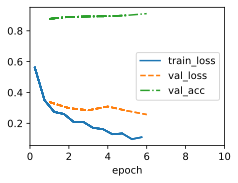

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

### **Exercise 8.6**

**1. What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?**
* Komputasi
  * Inception Block
    
    Lebih fleksibel dalam menangkap fitur, namun struktur jalur paralel dapat meningkatkan kompleksitas komputasi dan penggunaan memori.
  * Residual Block

    Komputasi lebih efisien sehingga memungkinkan pelatihan lebih cepat pada jaringan yang lebih dalam.
* Akurasi
  * Inception Block
    
    Akurasi cenderung baik, mampu mengekstrak fitur dari berbagai ukuran, tetapi kemungkinan akan kesulitan apabila jaringan semakin dalam.
  * Residual Block

    Meningkatkan akurasi pada jaringan yang sangat dalam dan memungkinkan model belajar fungsi identitas dengan lebih baik (mencegah overfitting).
* Classes of Functions
  * Inception Block

    Mampu menggambarkan kelas fungsi yang lebih luas dengan menggabungkan fitur dari berbagai skala dan bentuk.
  * Residual Block

    Lebih fokus pada pembelajaran representasi yang dalam dan efisien, sehingga mungkin tidak menangkap beberapa variasi skala dengan baik dibandingkan Inception block.

**2. Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.**

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import d2l

class Residual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class ResNet(d2l.torch.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(Residual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(Residual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

def experiment(data, model):
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

In [ ]:
data = d2l.torch.FashionMNIST(batch_size=64, resize=(224, 224))
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = ResNet(arch=arch18, lr=0.01)
experiment(data, resnet18)

In [ ]:
arch34 = [(3,[(64,3,1)]*2,None),(4,[(128,3,1)]*2,None),(6,[(256,3,1)]*2,None),(3,[(512,3,1)]*2,None)]
resnet34 = ResNet(arch=arch34, lr=0.01)
experiment(data, resnet34)

**3. For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.**

In [ ]:
arch50 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(6,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet50 = ResNet(arch=arch50, lr=0.01)
experiment(data, resnet50)

In [ ]:
arch101 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(23,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet101 = ResNet(arch=arch101, lr=0.01)
experiment(data, resnet101)

In [ ]:
arch152 = [(3,[(64,1,0),(64,3,1)],256),(8,[(128,1,0),(128,3,1)],512),(36,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet152 = ResNet(arch=arch152, lr=0.01)
experiment(data, resnet152)

**4. In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.**

In [ ]:
class SubResidual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class SubResNet(d2l.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(SubResidual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(SubResidual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = SubResNet(arch=arch18, lr=0.01)
experiment(data, resnet18)

**5. Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?**
* Meningkatkan kompleksitas model dapat menyebabkan overfitting karena model yang sangat kompleks dapat menangkap noise dalam data pelatihan, meskipun bukan merupakan pola yang relevan.
* Model yang kompleks memerlukan lebih banyak data dan waktu untuk dilatih sehingga kesulitan dalam optimalisasi juga meningkat.
* Semakin kompleks suatu model, akan semakin sulit untuk memahami dan menginterpretasi prediksi yang dihasilkan.
* Model yang kompleks membutuhkan lebih banyak sumber daya komputasi dan memori.
* Pada beberapa kasus, fungsi yang lebih kompleks tidak menawarkan lebih banyak informasi dibandingkan fungsi yang lebih sederhana. Sehingga membuat penambahan kompleksitas menjadi tidak efisien.

### **8.7 Densely Connected Networks (DenseNet)**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

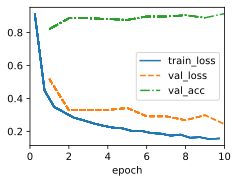

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

### **Exercise 8.7**

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import d2l
from torchsummary import summary


def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.torch.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
                 lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, num_convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                              growth_rate))
            # The number of output channels in the previous dense block
            num_channels += num_convs * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

**1. Why do we use average pooling rather than max-pooling in the transition layer?**
* Average pooling mempertahankan lebih banyak informasi penting dari fitur, sehingga memberikan representasi yang umum. Sementara max-pooling hanya mengambil nilai tertinggi dan membuang sisanya.

* Di DenseNet, average pooling mengurangi dimensi fitur secara lebih "halus", tanpa menghilangkan terlalu banyak detail, sehingga dapat mempertahankan informasi penting saat memperkecil ukuran feature map.

* Average pooling membantu menjaga kesinambungan informasi antar layer, sementara max-pooling lebih bersifat selektif dan dapat menghilangkan fitur penting.

**2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?**
* DenseNet menggunakan dense connections, artinya setiap layer menerima input dari semua layer sebelumnya, sehingga mengurangi kebutuhan untuk belajar fitur baru di setiap layer. Sementara, ResNet hanya menggunakan koneksi identitas antar beberapa layer.

* Pada DenseNet, jumlah parameter yang perlu dipelajari lebih sedikit. Sementara, ResNet justru membutuhkan lebih banyak parameter karena setiap blok residual di setiap layer harus mempelajari fitur baru.

* Pada DenseNet, layers individual cenderung lebih sederhana karena sedikit menghasilkan fitur baru dan mengandalkan fitur yang dihasilkan oleh layer sebelumnya. Sementara pada ResNet, setiap blok residual memiliki lebih banyak filter untuk mempelajari fitur tambahan.

**3. One problem for which DenseNet has been criticized is its high memory consumption.**
* Is this really the case? Try to change the input shape to $224 × 224$ to compare the actual GPU memory consumption empirically.

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(28, 28))
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

* Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

  * Membatasi jumlah koneksi dense
  
    Memodifikasi arsitektur jaringan agar hanya menerima input dari sejumlah layer sebelumnya (misal beberapa layer terdekat) akan mengurangi jumlah memori yang dibutuhkan.

  * Feature Pruning
    
    Menghapus atau membatasi fitur yang tidak relevan terhadap kinerja model dengan menambah algoritma pruning ke proses pelatihan model.

  * Mixed Precision Training
  
    Menggunakan precision yang lebih rendah seperti float16 (FP16) untuk penyimpanan dan operasi matematika.

  * Checkpointing
  
    Menambah metode checkpointing untuk menyimpan lebih sedikit intermediate activations selama forward pass dan menghitung ulang beberapa nilai saat backward pass.

**4. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).**

In [ ]:
import torch
from torch import nn
import d2l
from d2l import torch as d2l_torch

In [ ]:
def conv_block(num_channels, kernel_size, padding):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=kernel_size, padding=padding))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for kernel_size, padding in convs:
            layer.append(conv_block(num_channels, kernel_size, padding))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.torch.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=[[[3,1],[3,1]],[[3,1],[3,1]]],lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(convs, growth_rate))
            # The number of output channels in the previous dense block
            num_channels += len(convs) * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l_torch.init_cnn)

In [ ]:
data = d2l.torch.FashionMNIST(batch_size=32, resize=(224, 224))
arch121 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*24,[[1,0],[3,1]]*16])
densenet121 = DenseNet(lr=0.01, arch=arch121)
densenet121.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l_torch.init_cnn)
summary(densenet121, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]           2,080
       BatchNorm2d-8           [-1, 96, 56, 56]             192
              ReLU-9           [-1, 96, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          27,680
      BatchNorm2d-11          [-1, 128, 56, 56]             256
             ReLU-12          [-1, 128, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           4,128
      BatchNorm2d-14          [-1, 160,

In [ ]:
arch169 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*32,[[1,0],[3,1]]*32])
densenet169 = DenseNet(lr=0.01, arch=arch169)

In [ ]:
arch201 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*48,[[1,0],[3,1]]*32])
densenet201 = DenseNet(lr=0.01, arch=arch201)

In [ ]:
arch264 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*64,[[1,0],[3,1]]*48])
densenet264 = DenseNet(lr=0.01, arch=arch264)

**5. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.**

In [ ]:
import pandas as pd
import time
from tqdm import tqdm
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import cProfile
import d2l
from torchsummary import summary

class KaggleHouse(d2l.torch.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if train is None:
            self.raw_train = pd.read_csv(d2l.data_hub.download(d2l.DATA_URL+ 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.data_hub.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

    def preprocess(self, std_flag=True):
        label = 'SalePrice'
        features = pd.concat((self.raw_train.drop(columns=['Id',label]),
                              self.raw_val.drop(columns=['Id'])))
        numeric_features = features.dtypes[features.dtypes!='object'].index
        if std_flag:
            features[numeric_features] = features[numeric_features].apply(lambda x: (x-x.mean())/x.std())
        features[numeric_features] = features[numeric_features].fillna(0)
        features = pd.get_dummies(features, dummy_na=True)
        self.train = features[:self.raw_train.shape[0]].copy()
        self.train[label] = self.raw_train[label]
        self.val = features[self.raw_train.shape[0]:].copy()

    def get_dataloader(self, train):
        label = 'SalePrice'
        data = self.train if train else self.val
        if label not in data:
            return
        get_tensor = lambda x: torch.tensor(x.values.astype(float), dtype=torch.float32)
        # tensors = (get_tensor(data.drop(columns=[label])),
        #            torch.log(get_tensor(data[label])).reshape(-1,1))
        tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
        return self.get_tensorloader(tensors, train)

def k_fold_data(data,k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j*fold_size,(j+1)*fold_size)
        rets.append(KaggleHouse(data.batch_size,data.train.drop(index=idx),data.train.iloc[idx]))
    return rets

def k_fold(trainer, data, k, ModelClass,hparams,plot_flag=True):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data,k)):
        model = ModelClass(**hparams)
        model.board.yscale='log'
        if not plot_flag or i != 0:
            model.board.display=False
        trainer.fit(model,data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    avg_val_loss = sum(val_loss)/len(val_loss)
    print(f'average validation log mse = {avg_val_loss}, params:{hparams}')
    return models, avg_val_loss



class HouseResMLP(d2l.torch.LinearRegression):
    def __init__(self, num_outputs, num_hiddens, lr, dropouts, weight_decay):
        super().__init__(lr)
        self.save_hyperparameters()
        layers = [nn.Flatten()]
        for i in range(len(num_hiddens)):
            layers.append(nn.Sequential(nn.LazyLinear(num_hiddens[i]),
                                        nn.ReLU(),
                                        nn.Dropout(dropouts[i]),
                                        nn.LazyBatchNorm1d(),
                                        ))
        layers.append(nn.LazyLinear(num_outputs))
        self.net = nn.Sequential(*layers)

    def forward(self, X):
        X = self.net[0](X)
        for blk in self.net[1:-1]:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return self.net[-1](X)

# class HouseDenseBlock(nn.Module):
#     def __init__(self, num_hiddens):
#         super().__init__()
#         layer = []
#         for i in range(len(num_hiddens)):
#             layer.append(nn.Sequential(nn.LazyLinear(num_hiddens[i]),
#                                         nn.LazyBatchNorm1d(), nn.ReLU(),
#                                         ))
#         self.net = nn.Sequential(*layer)

#     def forward(self, X):
#         for blk in self.net:
#             Y = blk(X)
#             # Concatenate input and output of each block along the channels
#             X = torch.cat((X, Y), dim=1)
#         return X

# def transition_block():
#     return nn.Sequential(
#         nn.LazyBatchNorm1d(), nn.ReLU(),
#         nn.AvgPool1d(kernel_size=2, stride=2))

# class HouseResMLP(d2l.LinearRegression):
#     def __init__(self, num_outputs, arch, lr, dropouts, weight_decay):
#         super().__init__(lr)
#         self.save_hyperparameters()
#         layers = [nn.Flatten()]
#         for num_hiddens in arch:
#             layers.append(HouseDenseBlock(num_hiddens))
#             # layers.append(nn.LazyLinear(sum(num_hiddens)//4))
#         layers.append(nn.LazyLinear(num_outputs))
#         self.net = nn.Sequential(*layers)

#     def forward(self, X):
#         return self.net(X)

#     def configure_optimizers(self):
#         return torch.optim.SGD(self.parameters(), lr=self.lr, weight_decay=self.weight_decay)

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.01,
 'num_hiddens': [64,32,16,8],
 'num_outputs': 1,
 'weight_decay': 0}
model = HouseResMLP(**hparams)
summary(model,(1,80))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                   [-1, 80]               0
            Linear-2                   [-1, 64]           5,184
              ReLU-3                   [-1, 64]               0
           Dropout-4                   [-1, 64]               0
       BatchNorm1d-5                   [-1, 64]             128
            Linear-6                   [-1, 32]           4,640
              ReLU-7                   [-1, 32]               0
           Dropout-8                   [-1, 32]               0
       BatchNorm1d-9                   [-1, 32]              64
           Linear-10                   [-1, 16]           2,832
             ReLU-11                   [-1, 16]               0
          Dropout-12                   [-1, 16]               0
      BatchNorm1d-13                   [-1, 16]              32
           Linear-14                   

In [ ]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape, data.raw_val.shape)
data.preprocess()

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.01,
 'num_hiddens': [64,32,16,8],
 'num_outputs': 1,
 'weight_decay': 0}
trainer = d2l.torch.Trainer(max_epochs=10)
models,avg_val_loss = k_fold(trainer, data, k=5,ModelClass=HouseResMLP,hparams=hparams,plot_flag=True)

In [ ]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32)) for model in models]
ensemble_preds = torch.exp(torch.cat(preds,1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)

### **8.8 Designing Convolution Network Architectures**

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
from d2l.torch import Classifier

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


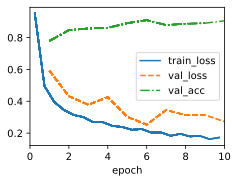

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

### **Exercise 8.8**

**1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?**

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import d2l
from torchsummary import summary

class AnyNet(d2l.torch.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels, groups, bot_mul):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                    use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6, 8, 16), (32, 80, 128, 256)
        super().__init__(
            # ((depths[0], channels[0], groups, bot_mul),
            #  (depths[1], channels[1], groups, bot_mul)),
            [(depths[i], channels[i], groups, bot_mul) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
model = RegNetX32(lr=0.05)
summary(model,(1,224,224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer.fit(model, data)

**2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?**

In [ ]:
class DeAnyNet(d2l.torch.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.Residual(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.Residual(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class DeResNeXt(DeAnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (5, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0]),
             (depths[1], channels[1])),
            stem_channels, lr, num_classes)

In [ ]:
model = DeResNeXt(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

**3. Implement multiple instances of a “VioNet” family by violating the design principles of RegNetX. How do they perform? Which of $(d_i, c_i, g_i, b_i)$ is the most important factor?**

In [ ]:
class VioNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10, depths=(4, 6), channels=(32, 80),
                 stem_channels=32, groups=(16, 16), bot_mul=(1, 1)):
        super().__init__(
            [(depths[i], channels[i], groups[i], bot_mul[i]) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
VioNet_d = VioNet(depths=(6, 4))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_d, data)

In [ ]:
VioNet_c = VioNet(channels=(80, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_c, data)

In [ ]:
VioNet_g = VioNet(groups=(16, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_g, data)

In [ ]:
VioNet_b = VioNet(bot_mul=(1, 2))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_b, data)

**4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?**
  * Depth and Width
    
    Desain dengan jaringan lebih dalam dan jumlah lapisan lebih banyak dapat menangkap pola yang lebih kompleks. Keseimbangan antara depth dan width tetap harus diperhatikan untuk menghindari overfitting.

  * Normalisasi dan Regularisasi:
    
    Penggunaan batch normalization atau dropout dapat mencegah overfitting, menjaga stabilitas pelatihan, dan memungkinkan jaringan bekerja dengan baik pada jaringan yang lebih besar.

  * Activation Functions
  
    Pemilihan fungsi aktivasi yang tepat seperti ReLU dapat menghindari masalah vanishing gradient, terutama pada jaringan yang lebih dalam.

  * Optimizers
  
    Dengan menggunakan optimizers yang efektif dapat mencapai hasil optimal dengan waktu pelatihan lebih singkat. Teknik seperti learning rate scheduling juga membantu.

  * Ekstrapolasi dari Jaringan Kecil ke Jaringan Besar
  
    Pada beberapa kasus, desain yang bekerja pada jaringan lebih kecil dapat diekstrapolasi ke jaringan lebih besar dengan tantangan tambahan, seperti overfitting, peningkatan kompleksitas komputasi, dan memori. Maka dari itu, perlu menyesuaikan hyperparameters seperti ukuran batch, learning rate, dan regularisasi.